In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Flatten
from sklearn.metrics import roc_curve, auc
random.seed(1234)



In [2]:
inputDf = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/inputDf.csv")

feature_columns = ["area", "angle0", "angle1", "angle2", "abs_slope"]

# Reshape the data into sequences of frames (128 consecutive rows)
num_frames = 128
num_features = len(feature_columns)



In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = inputDf[feature_columns].values
y_original = inputDf["trioSuccess"].values

# Split the data into training and testing sets, maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y_original, test_size=0.2, random_state=42, stratify=y_original)

# Reshape the training data for frame-level predictions
X_train_frame_level = X_train.reshape((len(X_train), 1, num_features))

# Define and train the LSTM model for frame-level predictions
model_frame = Sequential()
model_frame.add(LSTM(units=50, input_shape=(1, num_features)))  # LSTM layer for each frame
model_frame.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
model_frame.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_frame.fit(X_train_frame_level, y_train, epochs=10, batch_size=32)

2023-12-22 11:57:07.957744: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-22 11:57:07.957766: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-22 11:57:07.957770: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-22 11:57:07.957845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-22 11:57:07.957882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-12-22 11:57:08.735317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-22 11:57:08.787254: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-12-22 11:57:08.863842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    8/13156 [..............................] - ETA: 1:45 - loss: 0.6569 - accuracy: 0.6016   

2023-12-22 11:57:08.972188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13156/13156 [==============================] - 94s 7ms/step - loss: 0.0471 - accuracy: 0.9905
Epoch 2/10
13156/13156 [==============================] - 91s 7ms/step - loss: 0.0431 - accuracy: 0.9910
Epoch 3/10
13156/13156 [==============================] - 91s 7ms/step - loss: 0.0418 - accuracy: 0.9912
Epoch 4/10
13156/13156 [==============================] - 94s 7ms/step - loss: 0.0406 - accuracy: 0.9913
Epoch 5/10
13156/13156 [==============================] - 93s 7ms/step - loss: 0.0395 - accuracy: 0.9913
Epoch 6/10
13156/13156 [==============================] - 90s 7ms/step - loss: 0.0389 - accuracy: 0.9914
Epoch 7/10
13156/13156 [==============================] - 90s 7ms/step - loss: 0.0383 - accuracy: 0.9915
Epoch 8/10
13156/13156 [==============================] - 90s 7ms/step - loss: 0.0377 - accuracy: 0.9916
Epoch 9/10
13156/13156 [==============================] - 90s 7ms/step - loss: 0.0378 - accuracy: 0.9916
Epoch 10/10
13156/13156 [==============================] - 91s 7ms

3289/3289 [==============================] - 6s 2ms/step
Test Accuracy: 0.99


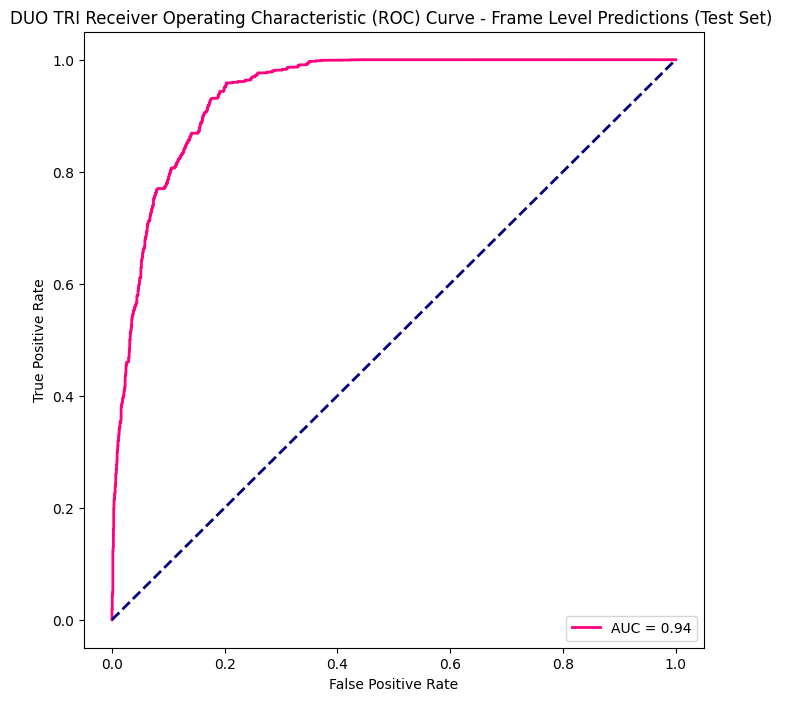

In [8]:
from sklearn.metrics import accuracy_score

# Reshape the testing data for frame-level predictions
X_test_frame_level = X_test.reshape((len(X_test), 1, num_features))

# Make predictions on the test set
y_pred_proba_frame_test = model_frame.predict(X_test_frame_level).ravel()

y_pred_frame_test = (y_pred_proba_frame_test > 0.5).astype(int)  # Threshold at 0.5 for binary classification


# Compute accuracy for frame-level predictions on the test set
accuracy_frame_test = accuracy_score(y_test, y_pred_frame_test)

# Display the test accuracy
print(f'Test Accuracy: {accuracy_frame_test:.2f}')

# Compute ROC curve and AUC for frame-level predictions on the test set
fpr_frame_test, tpr_frame_test, thresholds_frame_test = roc_curve(y_test, y_pred_proba_frame_test)
roc_auc_frame_test = auc(fpr_frame_test, tpr_frame_test)

# Plot ROC curve for frame-level predictions on the test set
plt.figure(figsize=(8, 8))
plt.plot(fpr_frame_test, tpr_frame_test, color='#FF007F', lw=2, label=f'AUC = {roc_auc_frame_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DUO TRI Receiver Operating Characteristic (ROC) Curve - Frame Level Predictions (Test Set) ')
plt.legend(loc='lower right')
plt.show()


3289/3289 [==============================] - 6s 2ms/step
Test Accuracy: 0.99


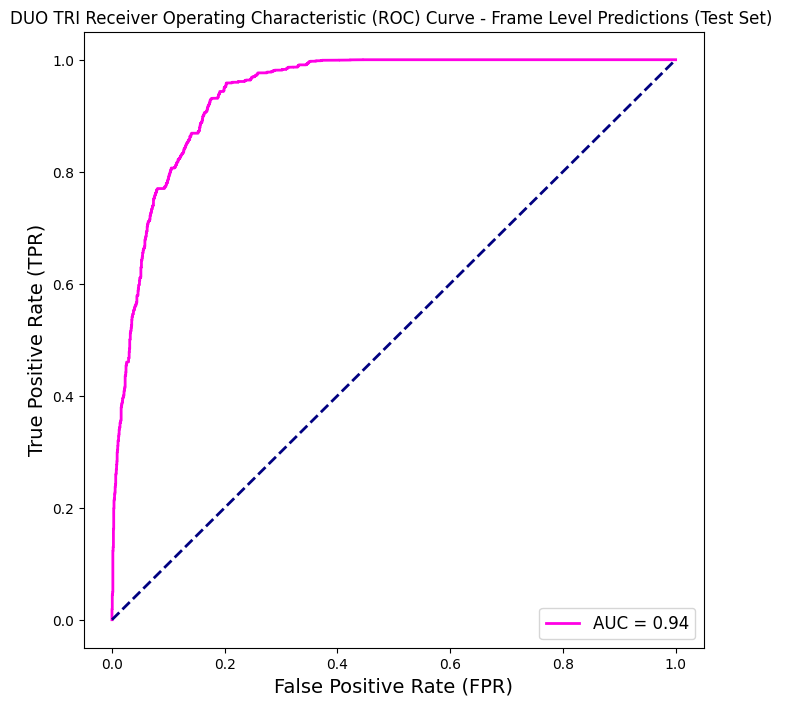

In [11]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Reshape the testing data for frame-level predictions
X_test_frame_level = X_test.reshape((len(X_test), 1, num_features))

# Make predictions on the test set
y_pred_proba_frame_test = model_frame.predict(X_test_frame_level).ravel()

y_pred_frame_test = (y_pred_proba_frame_test > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Compute accuracy for frame-level predictions on the test set
accuracy_frame_test = accuracy_score(y_test, y_pred_frame_test)

# Display the test accuracy
print(f'Test Accuracy: {accuracy_frame_test:.2f}')

# Compute ROC curve and AUC for frame-level predictions on the test set
fpr_frame_test, tpr_frame_test, thresholds_frame_test = roc_curve(y_test, y_pred_proba_frame_test)
roc_auc_frame_test = auc(fpr_frame_test, tpr_frame_test)

# Create a shiny pink gradient colormap
cmap = LinearSegmentedColormap.from_list('shiny_pink', ['#FF007F', '#FF00FF'])

# Plot ROC curve for frame-level predictions on the test set with shiny pink gradient color
plt.figure(figsize=(8, 8))
plt.plot(fpr_frame_test, tpr_frame_test, color=cmap(0.8), lw=2, label=f'AUC = {roc_auc_frame_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('DUO TRI Receiver Operating Characteristic (ROC) Curve - Frame Level Predictions (Test Set) ')
plt.legend(loc='lower right', fontsize=12)
plt.show()


Indices of zeros in y_test: [    18     28    140 ... 105118 105120 105173]


array([[1.33737000e+01, 2.15930412e+01, 4.08635185e+01, 1.17543440e+02,
        6.53276956e-01],
       [7.91540000e+00, 9.32383532e+00, 1.57645375e+02, 1.30307901e+01,
        8.66568193e-02],
       [2.10676000e+01, 2.08445534e+01, 5.40921472e+01, 1.05063299e+02,
        3.87225549e-01],
       ...,
       [6.37850000e-01, 1.91569168e+01, 2.58700438e+01, 1.34973039e+02,
        2.22506394e-01],
       [9.76420000e+00, 1.26614513e+01, 1.63959055e+02, 3.37949318e+00,
        7.52786221e-01],
       [4.37025000e+00, 2.17037111e+00, 1.72970606e+02, 4.85902309e+00,
        4.69074008e-01]])

In [22]:
#Play1223 = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/Play1223.csv")
#Play2608 = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/Play2608.csv")
#Play1613 = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/Play1613.csv")
#Play1099 = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/Play1099.csv")
#Play3046_ = pd.read_csv("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/Play3046_2.csv")

# Reshape the testing data for frame-level predictions
X_frame_level = X.reshape((len(X), 1, num_features))

# Make predictions on the test set
y_pred = model_frame.predict(X_frame_level).ravel()




# Assuming Play1223 has the same feature columns as the training data
#test_features = Play1223[feature_columns].values
test_features = X_frame_level[feature_columns].values

# Reshape the features to match the input shape
test_features_reshaped = test_features.reshape((1, num_frames, num_features))

# Initialize an array to store predictions for each frame
#predictions = np.zeros(num_frames)
predictions = np.zeros(len(X))

# Make predictions for each frame
for i in range(num_frames):
    frame_features = test_features_reshaped[:, i, :].reshape((1, 1, num_features))
    predictions[i] = model_frame.predict(frame_features)

# Display the DataFrame with predicted values
#print(type(predictions))
np.savetxt("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/predictions.csv", predictions, delimiter=',')




16444/16444 [==============================] - 34s 2ms/step


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Getting Predicted TriosSuccess Probability

In [ ]:
# Initialize an empty column for predicted probabilities
inputDf['predicted_trioSuccess'] = np.nan #8:35

i = 0
# Iterate through each row
for index, row in inputDf.iterrows():
    i = i+1;
    if(i%100000==0):
        print(i)
    # Extract features for the current row
    row_features = row[feature_columns].values
    
    # Reshape the features to match the input shape
    row_features_reshaped = row_features.reshape((1, 1, num_features))
    
    # Make prediction for the current row
    prediction = model_frame.predict(row_features_reshaped, verbose=0)[0, 0]
    #if(i%100==0):
    #    print(prediction)
    
    # Assign the predicted probability to the corresponding row in the original DataFrame
    inputDf.at[index, 'predicted_trioSuccess'] = prediction

# Display the DataFrame with predicted probabilities
print(inputDf)


100000
200000


In [25]:
X_frame_level = X.reshape((len(X), 1, num_features))

# Make predictions on the entire dataset
y_pred_proba_frame_all = model_frame.predict(X_frame_level).ravel()
np.savetxt("/Users/sithijamanage/Fall 2023/BigDataBowl2024/nfl-big-data-bowl-2024/fulllength_predictions.csv", y_pred_proba_frame_all, delimiter=',')

16444/16444 [==============================] - 34s 2ms/step
